# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Split training set further into training set and validation set

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.25)
    


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   29406 samples
Validation Set: 9803 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train) + len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train).union(y_validation).union(set(y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape = {:.0f} x {:.0f}".format(float(image_shape[1]), float(image_shape[2])))
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32 x 32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

We start by looking at a couple of images:

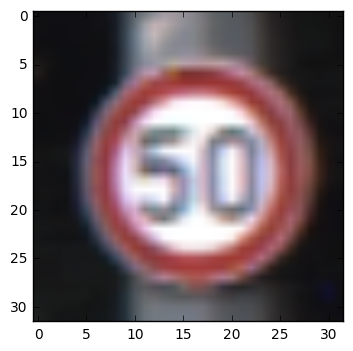

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Visualizations will be shown in the notebook.
%matplotlib inline
plt.imshow(X_train[0])

The above example shows one difficulty: as humans, we know that are actually two traffic signs and as drivers we also know *which* two traffic signs these are. If we insist that the algorithm can only output *one* traffic sign, this can actually be problematic: say, it classifies the above picture as pedestrian crossing, then it would actually be right, but it would reduce the accuracy.

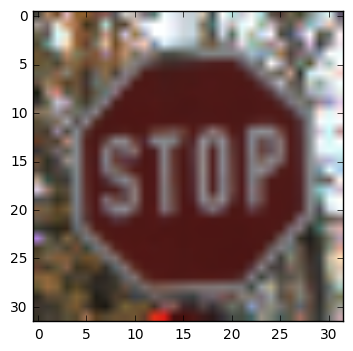

In [4]:
plt.imshow(X_train[300])

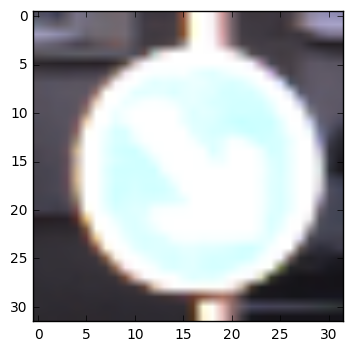

In [5]:
plt.imshow(X_train[24000])

We should also be able to recognize traffic signs in darker light conditions.

<Container object of 43 artists>

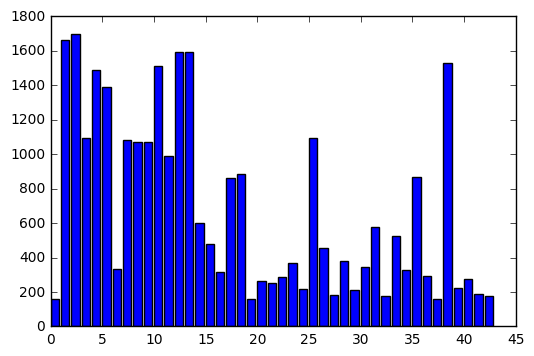

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
y_train_pd = pd.DataFrame(y_train, columns = ['Classid'])
y_train_labels = pd.read_csv("./signnames.csv")

y_train_pd = y_train_pd.join(y_train_labels, on = 'Classid', how = 'inner')

sign_count = y_train_pd['Classid'].value_counts()
plt.bar(sign_count.index, sign_count)

We see that there is a fair bit of class imbalance in the dataset.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
import cv2
LOWER_ANGLE = -15
UPPER_ANGLE = 15

def rotate_image(img, rotation_angle):
    rows, cols = img.shape[0:2]
    

    M = cv2.getRotationMatrix2D((cols/2,rows/2), rotation_angle, 1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = np.reshape(dst, (32, 32, 3))
    
    return(dst)

def rotate_all_images(images, LOWER_ANGLE, UPPER_ANGLE):
    return np.array([rotate_image(img, np.random.randint(LOWER_ANGLE, UPPER_ANGLE)) for img in images])

X_train = np.vstack([X_train, rotate_all_images(X_train, LOWER_ANGLE, UPPER_ANGLE)])
y_train = np.hstack([y_train, y_train])

In [ ]:
MAX_JITTER = 20

def jitter_image(img, max_jitter):
    h,w,c = img.shape 
    
    noise = np.random.randint(0, max_jitter, (h, w, c)) # design jitter/noise here
    zitter = np.zeros_like(img)
    
    zitter[:, :, 0] = noise[:, :, 0]
    zitter[:, :, 1] = noise[:, :, 1]
    zitter[:, :, 2] = noise[:, :, 2]
    noise_added = cv2.add(img, zitter)
    
    return noise_added

def jitter_all_images(images, max_jitter):
    jittered_list = [jitter_image(img, MAX_JITTER) for img in images]
    return(np.array(jittered_list))

X_train = np.vstack([X_train, jitter_all_images(X_train, MAX_JITTER)])
y_train = np.hstack([y_train, y_train])

In [ ]:
# Normalize data
X_train = (X_train - 128) / 128
X_validation = (X_validation - 128) / 128
X_test  = (X_test  - 128) / 128

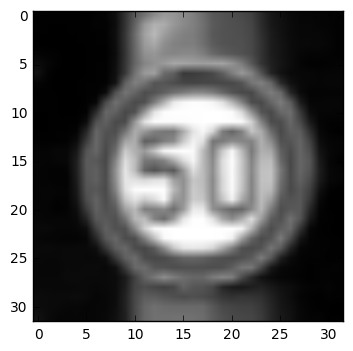

In [7]:
import cv2
def make_images_gray(images):
    gray_images = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in images]
    output = np.reshape(gray_images, (len(images), 32, 32, 1))
    return(output)

X_train_gray = make_images_gray(X_train)
X_validation_gray = make_images_gray(X_validation)
X_test_gray = make_images_gray(X_test)

plt.imshow(X_train_gray[0, :, :, 0], cmap='gray')

In [8]:
import cv2

def equalize_hist(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_yuv[:,:,1] = cv2.equalizeHist(img_yuv[:,:,1])
    img_yuv[:,:,2] = cv2.equalizeHist(img_yuv[:,:,2])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return(img_output)

def equalize_hist_all(images):
    return(np.array([equalize_hist(img) for img in images]))

X_train_hist_eq = equalize_hist_all(X_train)
X_validation_hist_eq = equalize_hist_all(X_validation)
X_test_hist_eq = equalize_hist_all(X_test)

In [9]:
def equalize_hist_gray(img):
    # equalize the histogram of img
    img_histeq = cv2.equalizeHist(img)

    return(img_histeq)

def equalize_hist_gray_all(images):
    """
    Histogram equalizes all images in the input
    and returns it in an appropriate shape (?, 32, 32, 1)
    """
    hist_eq_images = np.array([equalize_hist_gray(img) for img in images])
    return(np.reshape(hist_eq_images, (len(images), 32, 32, 1)))

X_train_hist_eq_gray = equalize_hist_gray_all(make_images_gray(X_train))
X_validation_hist_eq_gray = equalize_hist_gray_all(make_images_gray(X_validation))
X_test_hist_eq_gray = equalize_hist_gray_all(make_images_gray(X_test))

In [10]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

def clahe_gray(img):
    # equalize the histogram of img
    cl1 = clahe.apply(img)

    return(cl1)

def clahe_gray_all(images):
    clahed = np.array([clahe_gray(img) for img in images])
    output = np.reshape(clahed, (len(images), 32, 32, 1))
    return(output)

X_train_clahe_gray = clahe_gray_all(make_images_gray(X_train))
X_validation_clahe_gray = clahe_gray_all(make_images_gray(X_validation))
X_test_clahe_gray = clahe_gray_all(make_images_gray(X_test))

In [53]:
from tensorflow.contrib.layers import flatten

{'conv_filter_size_1': [5, 5, 3, 6], 
                'conv_filter_size_2': [5, 5, 6, 16],
                'fc1_size': 300}



def train_single_dnn(x, params, MU, SIGMA):
    """
    Trains a single deep neural network to be
    used in the formation of the MCDNN. The 
    architecture of a single DNN is
    1. convolutional layer
    2. max pooling layer
    3. convolutional layer
    4. max pooling layer
    5. fully connected layer
    6. fully connected layer
    
    The parameters of layers can be set with the
    param argument.
    
    :param x: training data, a 32x32x3 image
    :params params: a dictionary containing all parameters needed for training
    """
    # First convolutional layer
    conv1_W = tf.Variable(tf.truncated_normal(params['conv_filter_size_1'], mean = MU, stddev = SIGMA), name='weight_1')
    conv1_b = tf.Variable(tf.zeros(params['conv_filter_size_1'][3]), name='bias_1')
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # Max pooling layer
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    
    # Second convolutional layer
    conv2_W = tf.Variable(tf.truncated_normal(params['conv_filter_size_2'], mean = MU, stddev = SIGMA), name='weight_2')
    conv2_b = tf.Variable(tf.zeros(params['conv_filter_size_2'][3]), name='bias_2')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding='SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    # Max pooling layer
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    
    # Flatten last convolutional layer
    fc0 = flatten(conv2)
    fc1_shape = int(fc0.get_shape()[1])
    
    # First fully connected layer
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape, params['fc1_size']), mean=MU, stddev=SIGMA), name ='weight_3')
    fc1_b = tf.Variable(tf.zeros(params['fc1_size']), name='bias_3')
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    # Second fully connected layer
    fc2_W = fc1_W = tf.Variable(tf.truncated_normal(shape=(params['fc1_size'], n_classes), mean = MU, stddev = SIGMA), name='weight_4')
    fc2_b = tf.Variable(tf.zeros(n_classes), name='bias_4')
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return(logits)

In [102]:
import tensorflow as tf
learning_params = [{'BATCH_SIZE': 256, 'EPOCHS': 50, 'LEARNING_RATE': 0.0003, 'MU': 0, 'SIGMA': 0.03},
                   {'BATCH_SIZE': 16, 'EPOCHS': 20, 'LEARNING_RATE': 0.0002, 'MU': 0, 'SIGMA': 0.01},
                   {'BATCH_SIZE': 16, 'EPOCHS': 50, 'LEARNING_RATE': 0.0003, 'MU': 0, 'SIGMA': 0.13},
                   {'BATCH_SIZE': 64, 'EPOCHS': 50, 'LEARNING_RATE': 0.0001, 'MU': 0, 'SIGMA': 0.01},
                   {'BATCH_SIZE': 32, 'EPOCHS': 15, 'LEARNING_RATE': 0.0001, 'MU': 0, 'SIGMA': 0.03}]

X_train

model_dict = [{'X_train': X_train, 'y_train': y_train, #'X_validation': X_validation, 'y_validation': y_validation,
               'save_file': 'model_color', 'num_colors': 3},
             {'X_train': X_train_gray, 'y_train': y_train, 'X_validation': X_validation_gray, 'y_validation': y_validation,
               'save_file': 'model_gray', 'num_colors': 1},
             {'X_train': X_train_hist_eq, 'y_train': y_train, 'X_validation': X_validation_hist_eq, 'y_validation': y_validation,
               'save_file': 'model_histeq', 'num_colors': 3},
             {'X_train': X_train_hist_eq_gray, 'y_train': y_train, 'X_validation': X_validation_hist_eq_gray, 'y_validation': y_validation,
               'save_file': 'model_histeq_gray', 'num_colors': 1},
             {'X_train': X_train_gray, 'y_train': y_train, 'X_validation': X_validation_clahe_gray, 'y_validation': y_validation,
               'save_file': 'model_clahe', 'num_colors': 1}]

def training_pipeline(model_dict, learning_params):
    tf.reset_default_graph()
    
    LEARNING_RATE = learning_params['LEARNING_RATE']
    MU = learning_params['MU']
    SIGMA = learning_params['SIGMA']
    BATCH_SIZE = learning_params['BATCH_SIZE']
    EPOCHS = learning_params['EPOCHS']
    num_colors = model_dict['num_colors']
    X_train = model_dict['X_train']
    y_train = model_dict['y_train']
    #X_validation = model_dict['X_validation']
    #y_validation = model_dict['y_validation']
    save_file = model_dict['save_file']
    
    params_arch = {'conv_filter_size_1': [5, 5, num_colors, 6], 
                   'conv_filter_size_2': [5, 5, 6, 16],
                   'fc1_size': 300}
    
    # Input-output vars
    x = tf.placeholder(tf.float32, (None, 32, 32, num_colors))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)

    # Logits
    logits = train_single_dnn(x, params_arch, MU, SIGMA)

    # Error function
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
    training_operation = optimizer.minimize(loss_operation)
    
    # Evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Saver
    saver = tf.train.Saver()
    
    def evaluate(X_data, y_data, sess):
        num_examples = len(X_data)
        total_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            #validation_accuracy = evaluate(X_validation, y_validation, sess)
            print("EPOCH {} ...".format(i+1))
            #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        # Save the model
        saver.save(sess, save_file)
        print('Trained Model Saved.')
        sess.close()
    tf.reset_default_graph()
        

for model in model_dict:
    for k in range(len(learning_params)):
        model['save_file'] = model['save_file'] + '_' + str(k) + '.ckpt'
        training_pipeline(model, learning_params[k])

Training...

EPOCH 1 ...

Trained Model Saved.
Training...

EPOCH 1 ...

EPOCH 2 ...

EPOCH 3 ...

EPOCH 4 ...



KeyboardInterrupt: 

In [101]:
import tensorflow as tf

X_predict = X_validation[0:2]

def prediction_pipeline(X_predict):
    """
    Performs predictions on the numpy array X_predict.
    Does all the preprocessing on X_predict, loads the models
    and takes the mean of the output.
    
    :param X_predict: numpy array of shape (?, 32, 32, 3)
    """
    model_dict = [{'X_predict': X_predict, 'save_file': './model_color.ckpt', 'num_colors': 3},
                  {'X_predict': make_images_gray(X_predict), 'save_file': './model_gray.ckpt', 'num_colors': 1},
                  {'X_predict': equalize_hist_all(X_predict), 'save_file': './model_histeq.ckpt', 'num_colors': 3},
                  {'X_predict': equalize_hist_gray_all(make_images_gray(X_predict)), 'save_file': './model_histeq_gray.ckpt', 'num_colors': 1},
                  {'X_predict': clahe_gray_all(make_images_gray(X_predict)), 'save_file': './model_clahge.ckpt', 'num_colors': 1}]
    
    learning_params = {'BATCH_SIZE': 256,
                       'EPOCHS': 50,
                       'LEARNING_RATE': 0.0003,
                       'MU': 0,
                       'SIGMA': 0.03}

    
    output = np.zeros(shape = (X_predict.shape[0], n_classes))
    
    tf.reset_default_graph()
    
    def predict_single_dnn(model_dict):
        with tf.Session() as sess:
            
            params_arch = {'conv_filter_size_1': [5, 5, model_dict['num_colors'], 6], 
                           'conv_filter_size_2': [5, 5, 6, 16],
                           'fc1_size': 300}
            
            # Input-output vars
            x = tf.placeholder(tf.float32, (None, 32, 32, model_dict['num_colors']))
            y = tf.placeholder(tf.int32, (None))
            one_hot_y = tf.one_hot(y, n_classes)
            
            # Logits
            logits = train_single_dnn(x, params_arch, 0, 0)
            
            all_vars = tf.trainable_variables()
            #model_graph = tf.train.import_meta_graph(model_dict['save_file'])
            loader = tf.train.Saver()
            loader.restore(sess, model_dict['save_file'])
            
            #sess.run(tf.global_variables_initializer())
            output = sess.run(logits, feed_dict={x: model_dict['X_predict']})
            
            return(output)
    
    for model in model_dict:
        tf.reset_default_graph()
        output += predict_single_dnn(model)
    
    output = output / len(model_dict)
    
    return(output)
        
predicted = prediction_pipeline(X_validation)

In [97]:
def calculate_accuracy(predicted, actual):
    """
    Calculates the accuracy of the predictions 
    versus the actual values
    
    :param predicted: numpy array of shape (?, n_classes)
    :param actual: numpy array of (?) with distinct entries 0:n_classes
    """
    prediction = predicted.argmax(axis=1)
    indicator = prediction == actual
    return(indicator.mean())
    
calculate_accuracy(predicted, y_validation)

0.82658369886769356



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** My main references are [Sermanet, Lecun; 1](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) and [Cireşan, Meier, Masci, Schmidhuber; 2](http://ac.els-cdn.com.ezp-prod1.hul.harvard.edu/S0893608012000524/1-s2.0-S0893608012000524-main.pdf?_tid=dec03790-c694-11e6-a761-00000aab0f6c&acdnat=1482225517_559448f2440e3c5b5378a60f5b69841b). One idea that I obtained from these papers is to enlarge the training set by randomly perturbing the pixel position, perturbing the scale and rotation. This should make the detection more robust. 
Furthermore, in order to enlarge **a lot to be done**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## References

# Appendix

## Code for Cross Valdiation

In [ ]:
def sample_learning_params(learning_params_grid):
    sample_params = {}
    for key in learning_params_grid:
        random_index = np.random.randint(low = 0, high = len(learning_params_grid[key]))
        sample_params[key] = learning_params_grid[key][random_index]

    return(sample_params)

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import os.path
file_path = './SDNN_color_histeq.csv'
num_colors = 3

n_iterations = 30

params_learn = {'LEARNING_RATE': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
               'BATCH_SIZE': [16, 32, 64, 128, 256],
               'MU': [0],
               'SIGMA': [0.01, 0.03, 0.1, 0.3, 1],
               'EPOCHS': [10, 15, 20]}

params_arch = [{'conv_filter_size_1': [5, 5, num_colors, 6], 
                'conv_filter_size_2': [5, 5, 6, 16],
                'fc1_size': 300},
               {'conv_filter_size_1': [5, 5, 1, 6],
                'conv_filter_size_2': [5, 5, 6, 16],
                'fc1_size': 300},
               {'conv_filter_size_1': [5, 5, 3, 16],
                'conv_filter_size_2': [5, 5, 16, 32],
                'fc1_size': 80},
               {'conv_filter_size_1': [7, 7, 3, 8],
                'conv_filter_size_2': [7, 7, 8, 6],
                'fc1_size': 120},
               {'conv_filter_size_1': [5, 5, 3, 32],
                'conv_filter_size_2': [5, 5, 32, 16],
                'fc1_size': 80}]

def training_pipeline(X_train, y_train, X_validation, y_validation, learning_params):
    LEARNING_RATE = learning_params['LEARNING_RATE']
    MU = learning_params['MU']
    SIGMA = learning_params['SIGMA']
    BATCH_SIZE = learning_params['BATCH_SIZE']
    EPOCHS = learning_params['EPOCHS']
    
    # Input-output vars
    x = tf.placeholder(tf.float32, (None, 32, 32, num_colors))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)

    # Logits
    logits = train_single_dnn(x, params_arch[0], MU, SIGMA)

    # Error function
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
    training_operation = optimizer.minimize(loss_operation)
    
    # Evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    def evaluate(X_data, y_data, sess):
        num_examples = len(X_data)
        total_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_validation, y_validation, sess)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    
    learning_params['ACCURACY'] = validation_accuracy
    return(learning_params)



def tune_parameter_random_search(X_train, y_train, X_validation, y_validation, params_learn, n_iterations):
    results = []
    for k in range(n_iterations):
        params = sample_learning_params(params_learn)
        print("Learning parameters:")
        print(params)
        results_params = training_pipeline(X_train, y_train, X_validation, y_validation, params)
        if os.path.isfile(file_path):
            pd.DataFrame(results_params, index=[0]).to_csv(file_path, mode='a', header = False)
        else:
            pd.DataFrame(results_params, index=[0]).to_csv(file_path, index = False)
            
        results.append(results_params)

    return(results)

cv_results = tune_parameter_random_search(X_train, y_train, X_validation, y_validation, 
                                          params_learn, n_iterations)